In [1]:
# %%
import sys
sys.path.append('../')

from configs.config import *
from utils.losses import * 
from utils.plot import * 
from utils.model import * 
from utils.utils import * 
from utils.env import * 
from utils.reward import * 

import numpy as np 
from torch import nn 
import torch
from torch.distributions.categorical import Categorical

from matplotlib import pyplot as plt 
from tqdm import tqdm, trange


In [2]:
# Instantiate model and optimizer
model = TBModel(10)
A_reward = SimpleReward()
env = Env(reward=A_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [3]:
gfn.train(opt, N_EPISODES)

Training iter (loss=174.325165): 100%|██████████| 5000/5000 [00:07<00:00, 684.00it/s]


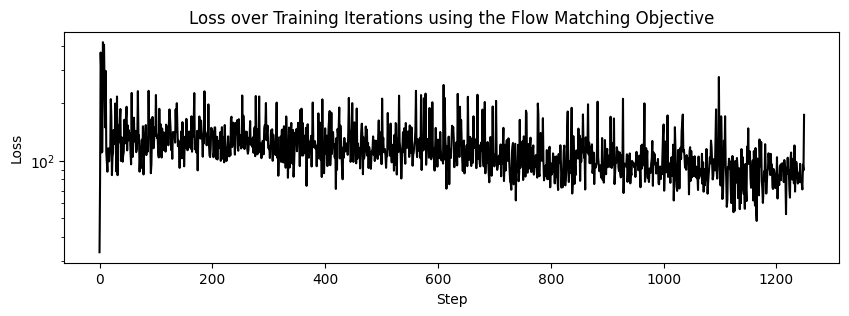

In [4]:
plot_loss_curve(gfn.losses, title="Loss over Training Iterations using the Flow Matching Objective")

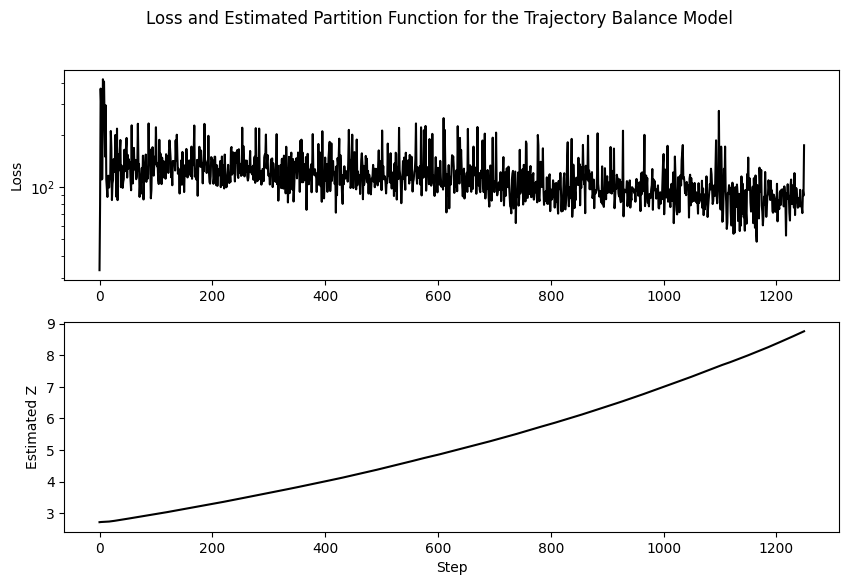

In [5]:
plot_loss_logZ_curves(gfn.losses, gfn.logZs)

In [6]:
print("The final Z (partition function) estimate is {:.2f}".format(model.logZ.exp().item()))

The final Z (partition function) estimate is 8.77


In [9]:
# Check samples
sampled_seqs = gfn.sample(10)
for sample in sampled_seqs:
    print(f"{sample}: {sample.count('A')} A's")


['C', 'C', 'G', 'T', 'T']: 0 A's
['C', 'T', 'A', 'T', 'A']: 2 A's
['A', 'A', 'A', 'A', 'G']: 4 A's
['A', 'A', 'T', 'T', 'C']: 2 A's
['A', 'A', 'T', 'T', 'C']: 2 A's
['A', 'A', 'G', 'A', 'C']: 3 A's
['T', 'A', 'A', 'G', 'T']: 2 A's
['T', 'A', 'A', 'T', 'A']: 3 A's
['A', 'A', 'T', 'C', 'G']: 2 A's
['A', 'A', 'A', 'A', 'C']: 4 A's


In [17]:
# Check mean of each character among runs
sampled_seqs = gfn.sample(1000)
for letter in VOCAB:
    print(f"{letter}: {(np.array(sampled_seqs) == letter).sum(axis=1).mean()} per seq in average")

A: 4.345 per seq in average
C: 3.545 per seq in average
G: 3.356 per seq in average
T: 3.754 per seq in average
#: 0.0 per seq in average


Try with new reward

In [9]:
class NewReward(Reward):
    """Simple Reward class that counts number of A in sequence"""
    def __init__(self, name='simple_reward') -> None:
        super().__init__(name)
        
    def get_reward(self, state: list[str]) -> Float:
        # 2*occurrences of 'A' + 1* occurence of 'C' in state
        return float(state.count(CHAR_TO_IDX['C']) + 2*state.count(CHAR_TO_IDX['A']))

In [10]:
# Instantiate model and optimizer
model = TBModel(10)
new_reward = NewReward()
env = Env(reward=new_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [11]:
gfn.train(opt, N_EPISODES)

Training iter (loss=85.050819): 100%|██████████| 10000/10000 [00:13<00:00, 723.00it/s]
